In [1]:
#Import the needed libraries
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

from fakequadrature import quadrature_weights

In [2]:
# Define the test function
f = lambda y: 1/(1+4*y**2)

In [3]:
# Define the parameters
a, b = -2, 2 # Integration interval
LenFor = 40 # Maximum degree for the polynomial interpolation

In [4]:
# Define the mapping function
def S(x):
    return -((b-a)/2)*np.cos(np.pi*(x-a)/(b-a)) + (b+a)/2

In [5]:
# Compute the true integral
Itrue, _ = quad(f,a,b)

In [6]:
Err, ErrCL, Errf = [], [], [] # Initialize
# Compute the weights and approximate the integral
for Deg in np.arange(1,LenFor,2):
    # Define the degree and the equispaced nodes
    N_nodes = Deg+1
    x = np.linspace(a,b,N_nodes)
    xCL = S(x) #Chebyshev-Lobatto pts
    # Define the funtion values for equispaced and CL nodes
    y = f(x)
    yCL = f(xCL)
    # Compute the weights for the fake nodes approach
    wf = (b-a)*np.ones((N_nodes))/Deg
    wf[0] /= 2; wf[-1] /= 2
    # Compute the standard and CL weights
    w = quadrature_weights(x, (a,b))
    wCL = quadrature_weights(xCL, (a,b))

    # Approximate the integrals
    I  = y.dot(w)
    ICL  = yCL.dot(wCL)
    If  = y.dot(wf)
    # Compute the errors
    err = np.abs(I-Itrue)
    errCL = np.abs(ICL-Itrue)
    errf = np.abs(If-Itrue)
    Err.append(err)
    ErrCL.append(errCL)
    Errf.append(errf)

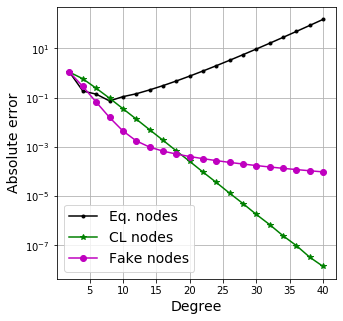

In [7]:
# Plotting tools
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.cla()
asc = list(1+np.arange(1,LenFor,2))
ax.semilogy(asc,Err,'.-k',asc,ErrCL,'*-g',asc,Errf,'o-m')
ax.set_xlabel("Degree", fontsize = 14)
ax.set_ylabel("Absolute error", fontsize = 14)
ax.legend(["Eq. nodes","CL nodes","Fake nodes"],loc = 'best', fontsize = 14)
ax.grid(True)
plt.savefig("rungefig.png")
plt.show()